In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import fmin_powell, fmin_bfgs, fmin_cg, minimize, SR1

In [28]:

def r(i, x):
    if i % 2 == 1:
        return (x[i]**2 - x[i - 1] ** 2) 
    else:
        return 5 * x[i-1] ** 2

def f(m):
    def result(x):
        return sum([r(i, x) ** 2 for i in range(1, m + 1)])
    return result

In [11]:
def getLosses(retall, target_point, func):

    losses = []
    for point in retall:
        losses.append(np.abs(func(target_point) - func(point)))
    return losses

In [12]:
sr1_losses = [] 
func = f(4) 


def getCallback(func, target_point, ftol, retall):

    def result(xk, state=None):
        if retall:
            global func, sr1_losses
        loss = np.abs(func(target_point) - func(xk))
        if loss < ftol:
            return True
        else:
            if retall:
                sr1_losses.append(loss)
            return False
    return result

In [13]:
def plotDownCurve(dpi, losses, labels, xlabel=None, ylabel=None, title=None, grid=True):
    plt.figure(dpi=dpi)
    for loss, label in zip(losses, labels):
        plt.plot(loss, label=label)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=18)
    plt.yscale("log")
    plt.grid(grid)
    plt.legend()

In [29]:
x_0 = np.array([2.25, -5.56, 3.999,9.878])   
target_point = np.array([0,0,0,0], dtype="float32")    
FTOL = 1e-8     
sr1_callback = getCallback(func, target_point, ftol=FTOL, retall=True)
dfp_callback = getCallback(func, target_point, ftol=FTOL, retall=False)
bfgs_callback = getCallback(func, target_point, ftol=FTOL, retall=False)

In [30]:
minimum = minimize(fun=f(4), x0=x_0,       
                   method="trust-constr",
                   hess=SR1(),
                   callback=sr1_callback)

dfp_minimum, dfp_retall = fmin_powell(func=func, x0=x_0,
                                      retall=True,
                                      disp=False,
                                      callback=dfp_callback)
dfp_losses = getLosses(dfp_retall, target_point, func=func)

bfgs_minimum, bfgs_retall = fmin_bfgs(f=func, x0=x_0,
                                      retall=True,
                                      disp=False,
                                      callback=bfgs_callback)
bfgs_losses = getLosses(bfgs_retall, target_point, func=func)

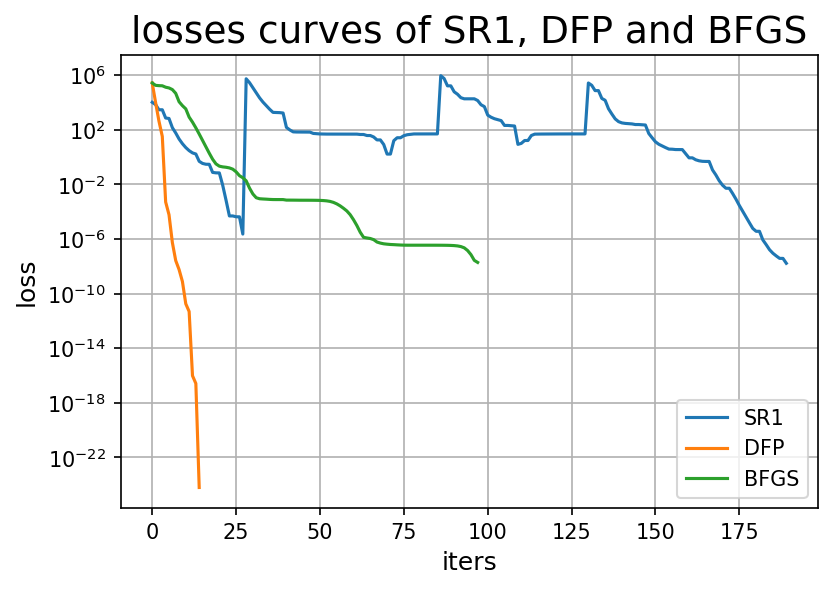

In [31]:
plotDownCurve(dpi=150,  
              losses=[sr1_losses, dfp_losses, bfgs_losses],
              labels=["SR1", "DFP", "BFGS"],
              xlabel="iters",   
              ylabel="loss",
              title="losses curves of SR1, DFP and BFGS")
plt.show() 

In [33]:
print(f"SR1\t:{minimum.x.tolist()}")
print(f"DFP\t:{dfp_minimum}")
print(f"BFGS\t:{bfgs_minimum}")

SR1	:[-0.00848888866597693, 0.0035069707390248837, -0.0031569888640058863, -0.0027884488827542844]
DFP	:[-6.68156695e-07  3.20242067e-07  6.24682431e-07  2.77672745e-07]
BFGS	:[-0.00793843  0.00448947 -0.0028109   0.00411927]
